# Two Port Nodes

## T-Network of Resistors, Combined using ABCD Cascading Matrices

> Ref:
> * https://en.wikipedia.org/wiki/Two-port_network#ABCD-parameters

$$
Znet = \bigg(
\begin{bmatrix}
a_{11}=1 & a_{12}=R_1 \\
a_{21}=0 & a_{22}=1
\end{bmatrix}
@
\begin{bmatrix}
a_{11}=1 & a_{12}=0 \\
a_{21}=\frac{1}{R_2} & a_{22}=1
\end{bmatrix}
@
\begin{bmatrix}
a_{11}=1 & a_{12}=R_3 \\
a_{21}=0 & a_{22}=1
\end{bmatrix}
\bigg)_{.to\_Z()}
$$

where $@$ is the matrix product.

$$
Y_{in} = y_{11} - \frac{y_{12} y_{21}}{Y_L + y_{22}}
$$

$$
Y_{out} = y_{22} - \frac{y_{12} y_{21}}{Y_s + y_{11}}
$$

$$
Z_{in} = z_{11} - \frac{z_{12} z_{21}}{Z_L + z_{22}}
$$

$$
Z_{out} = z_{22} - \frac{z_{12} z_{21}}{Z_S + z_{11}}
$$

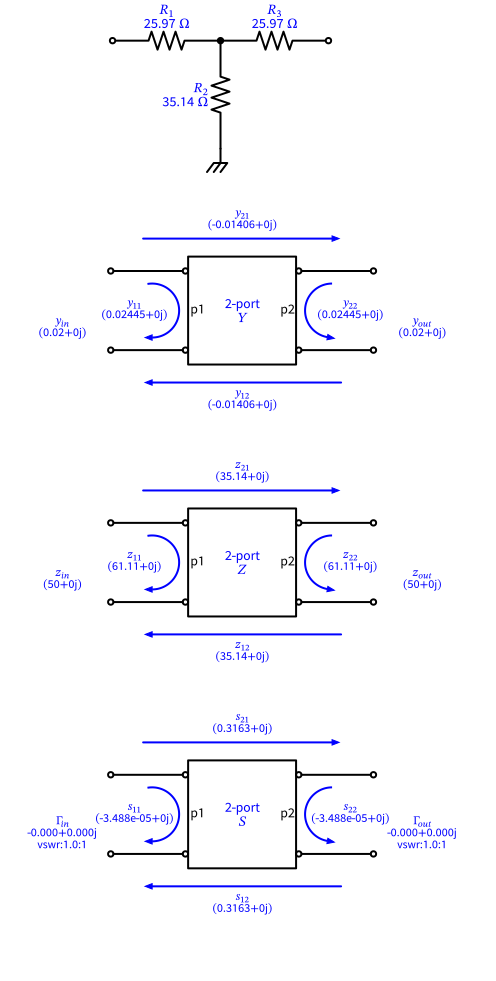

In [1]:
import math
import sys
from functools import reduce
from operator import matmul

import numpy as np
import pint
import schemdraw as schem
import schemdraw.elements as e

sys.path.append("../lib")
from schematics import Node2P
from ycx_complex_numbers import Neta, Netb, NetY, NetZ, Y, Z

schem.use("svg")

ureg = pint.UnitRegistry()
ureg = pint.UnitRegistry(autoconvert_offset_to_baseunit=True)

# 10db pad for 50 Ohm
R1 = 25.97
R2 = 35.14
R3 = 25.97

ZS = 50 + 0j
ZL = 50 + 0j

# combine using ABCD cascades
a = []
a.append(Neta(a11=1, a12=R1, a21=0, a22=1))
a.append(Neta(a11=1, a12=0, a21=1 / R2, a22=1))
a.append(Neta(a11=1, a12=R3, a21=0, a22=1))
aa = reduce(matmul, a)
yaa = aa.to_Y()
zaa = aa.to_Z()
saa = aa.to_S()

d = schem.Drawing()
d += e.Gap().right()
d.push()
d += e.Dot(open=True)
d += e.Resistor().label(f"$R_1$\n{(R1*ureg.ohms):~#P}", color="blue").right()
d += e.Dot()
d.push()
d += e.Resistor().label(f"$R_2$\n{(R2*ureg.ohms):~#P}", color="blue").down()
d += e.GroundChassis()
d.pop()
d += e.Resistor().label(f"$R_3$\n{(R3*ureg.ohms):~#P}", color="blue").right()
d += e.Dot(open=True)
d.pop()

d += e.Gap().down().length(9)


def draw_nodes(d=None, y=None, z=None, s=None):
    yin = y.yin(YL=1 / ZL)
    yout = y.yout(YS=1 / ZS)

    zin = z.zin(ZL=ZL)
    zout = z.zout(ZS=ZS)

    d += (
        N1 := Node2P(
            name="2-port\n$Y$",
            x11="$y_{11}$\n" + f"{y.y11.c:.4}",
            x12="$y_{12}$\n" + f"{y.y12.c:.4}",
            x21="$y_{21}$\n" + f"{y.y21.c:.4}",
            x22="$y_{22}$\n" + f"{y.y22.c:.4}",
            inp="$y_{in}$\n" + f"{yin.c:.4}",
            outp="$y_{out}$\n" + f"{yout.c:.4}",
        ).right()
    )

    d += e.Gap().down().length(7)
    d += (
        N1 := Node2P(
            name="2-port\n$Z$",
            x11="$z_{11}$\n" + f"{z.z11.c:.4}",
            x12="$z_{12}$\n" + f"{z.z12.c:.4}",
            x21="$z_{21}$\n" + f"{z.z21.c:.4}",
            x22="$z_{22}$\n" + f"{z.z22.c:.4}",
            inp="$z_{in}$\n" + f"{zin.c:.4}",
            outp="$z_{out}$\n" + f"{zout.c:.4}",
        ).right()
    )

    if s is not None:
        rin = s.reflcoefin()
        vswr_in = (1 + abs(rin)) / (1 - abs(rin))

        rout = s.reflcoefout()
        vswr_out = (1 + abs(rout)) / (1 - abs(rout))

        d += e.Gap().down().length(7)
        d += (
            N1 := Node2P(
                name="2-port\n$S$",
                x11="$s_{11}$\n" + f"{s.s11.c:.4}",
                x12="$s_{12}$\n" + f"{s.s12.c:.4}",
                x21="$s_{21}$\n" + f"{s.s21.c:.4}",
                x22="$s_{22}$\n" + f"{s.s22.c:.4}",
                inp="$\\Gamma_{in}$\n" + f"{rin.c:.3f}\nvswr:{vswr_in:.1f}:1",
                outp="$\\Gamma_{out}$\n" + f"{rout.c:.3f}\nvswr:{vswr_out:.1f}:1",
            ).right()
        )

    d += e.Gap().down()


draw_nodes(d=d, y=yaa, z=zaa, s=saa)
d.draw()

## $\pi$-Network of Resistors, Combined using ABCD Cascading Matrices

$$
Znet = \bigg(
\begin{bmatrix}
a_{11}=1 & a_{12}=0 \\
a_{21}=\frac{1}{R_1} & a_{22}=1
\end{bmatrix}
@
\begin{bmatrix}
a_{11}=1 & a_{12}=R_2 \\
a_{21}=0 & a_{22}=1
\end{bmatrix}
@
\begin{bmatrix}
a_{11}=1 & a_{12}=0 \\
a_{21}=\frac{1}{R_3} & a_{22}=1
\end{bmatrix}
\bigg)_{.to\_Z()}
$$

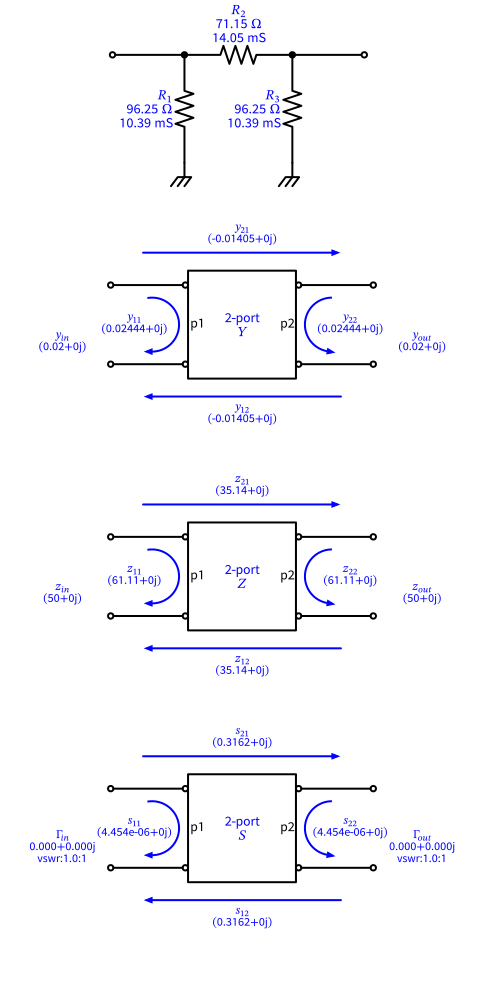

In [2]:
# 10dB pad for 50 Ohm
R1 = 96.25
R2 = 71.15
R3 = 96.25

ZS = 50 + 0j
ZL = 50 + 0j

Y1 = 1 / R1
Y2 = 1 / R2
Y3 = 1 / R3

# combine using ABCD cascades
a = []
a.append(Neta(a11=1, a12=0, a21=1 / R1, a22=1))
a.append(Neta(a11=1, a12=R2, a21=0, a22=1))
a.append(Neta(a11=1, a12=0, a21=1 / R3, a22=1))
aa = reduce(matmul, a)
yaa = aa.to_Y()
zaa = aa.to_Z()
saa = aa.to_S()

d = schem.Drawing()
d += e.Gap().right()
d.push()

d += e.Dot(open=True)
d += e.Line().length(2)
d += e.Dot()
d.push()
d += (
    e.Resistor()
    .label(f"$R_1$\n{(R1*ureg.ohms):~#P}\n{(Y1 * ureg.mhos):.2f~#P}", color="blue")
    .down()
)
d += e.GroundChassis()

d.pop()
d += (
    e.Resistor()
    .label(f"$R_2$\n{(R2*ureg.ohms):~#P}\n{(Y2 * ureg.mhos):.2f~#P}", color="blue")
    .right()
)
d += e.Dot()
d.push()
d += (
    e.Resistor()
    .label(f"$R_3$\n{(R3*ureg.ohms):~#P}\n{(Y3 * ureg.mhos):.2f~#P}", color="blue")
    .down()
)
d += e.GroundChassis()
d.pop()
d += e.Line().length(2)
d += e.Dot(open=True)
d.pop()
d += e.Gap().down().length(9)

draw_nodes(d=d, y=yaa, z=zaa, s=saa)
d.draw()

## Chebyshev Pi Low Pass Filter (80MHz cutoff, $Z_0=75\Omega$), using ABCD Cascading Matrices

Characteristics shown for 70MHz:-

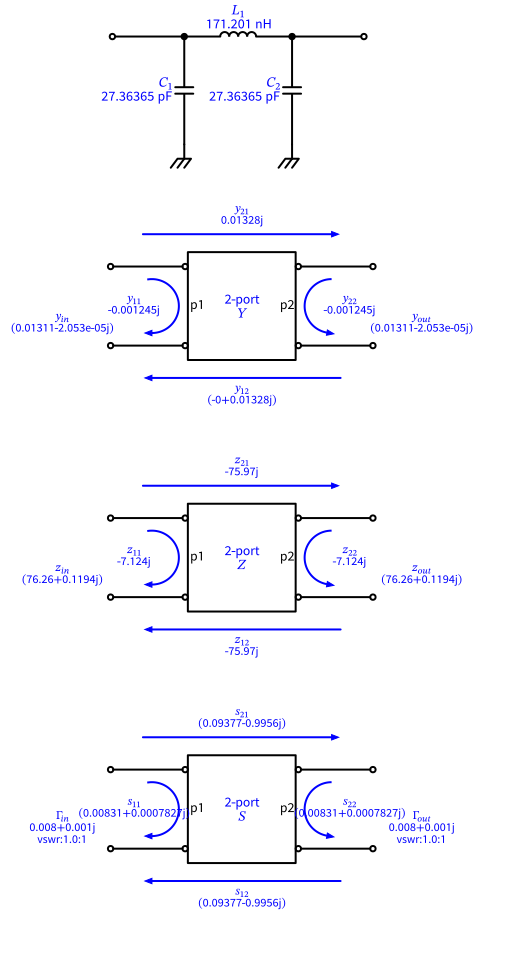

In [3]:
# Chebyshev Pi low pass, cutoff 80MHz
F = 70 * 10**6
C1 = 27.36365 * 10**-12
L1 = 171.201 * 10**-9
C2 = 27.36365 * 10**-12

ZS = 75 + 0j
ZL = 75 + 0j

jw = 1j * 2 * math.pi * F

# combine using ABCD cascades
a = []
a.append(Neta(a11=1, a12=0, a21=jw * C1, a22=1))
a.append(Neta(a11=1, a12=jw * L1, a21=0, a22=1))
a.append(Neta(a11=1, a12=0, a21=jw * C2, a22=1))
aa = reduce(matmul, a)
yaa = aa.to_Y()
zaa = aa.to_Z()
saa = aa.to_S(Z0=75 + 0j)

d = schem.Drawing()
d += e.Gap().right()
d.push()

d += e.Dot(open=True)
d += e.Line().length(2)
d += e.Dot()
d.push()
d += e.Capacitor().label(f"$C_1$\n{(C1*ureg.farad):.5f~#P}", color="blue").down()
d += e.GroundChassis()

d.pop()
d += e.Inductor().label(f"$L_1$\n{(L1*ureg.henry):.3f~#P}", color="blue").right()
d += e.Dot()
d.push()
d += e.Capacitor().label(f"$C_2$\n{(C2*ureg.farad):.5f~#P}", color="blue").down()
d += e.GroundChassis()
d.pop()
d += e.Line().length(2)
d += e.Dot(open=True)
d.pop()
d += e.Gap().down().length(9)

draw_nodes(d=d, y=yaa, z=zaa, s=saa)
d.draw()

### Spice analysis of the chebyshev low pass filter

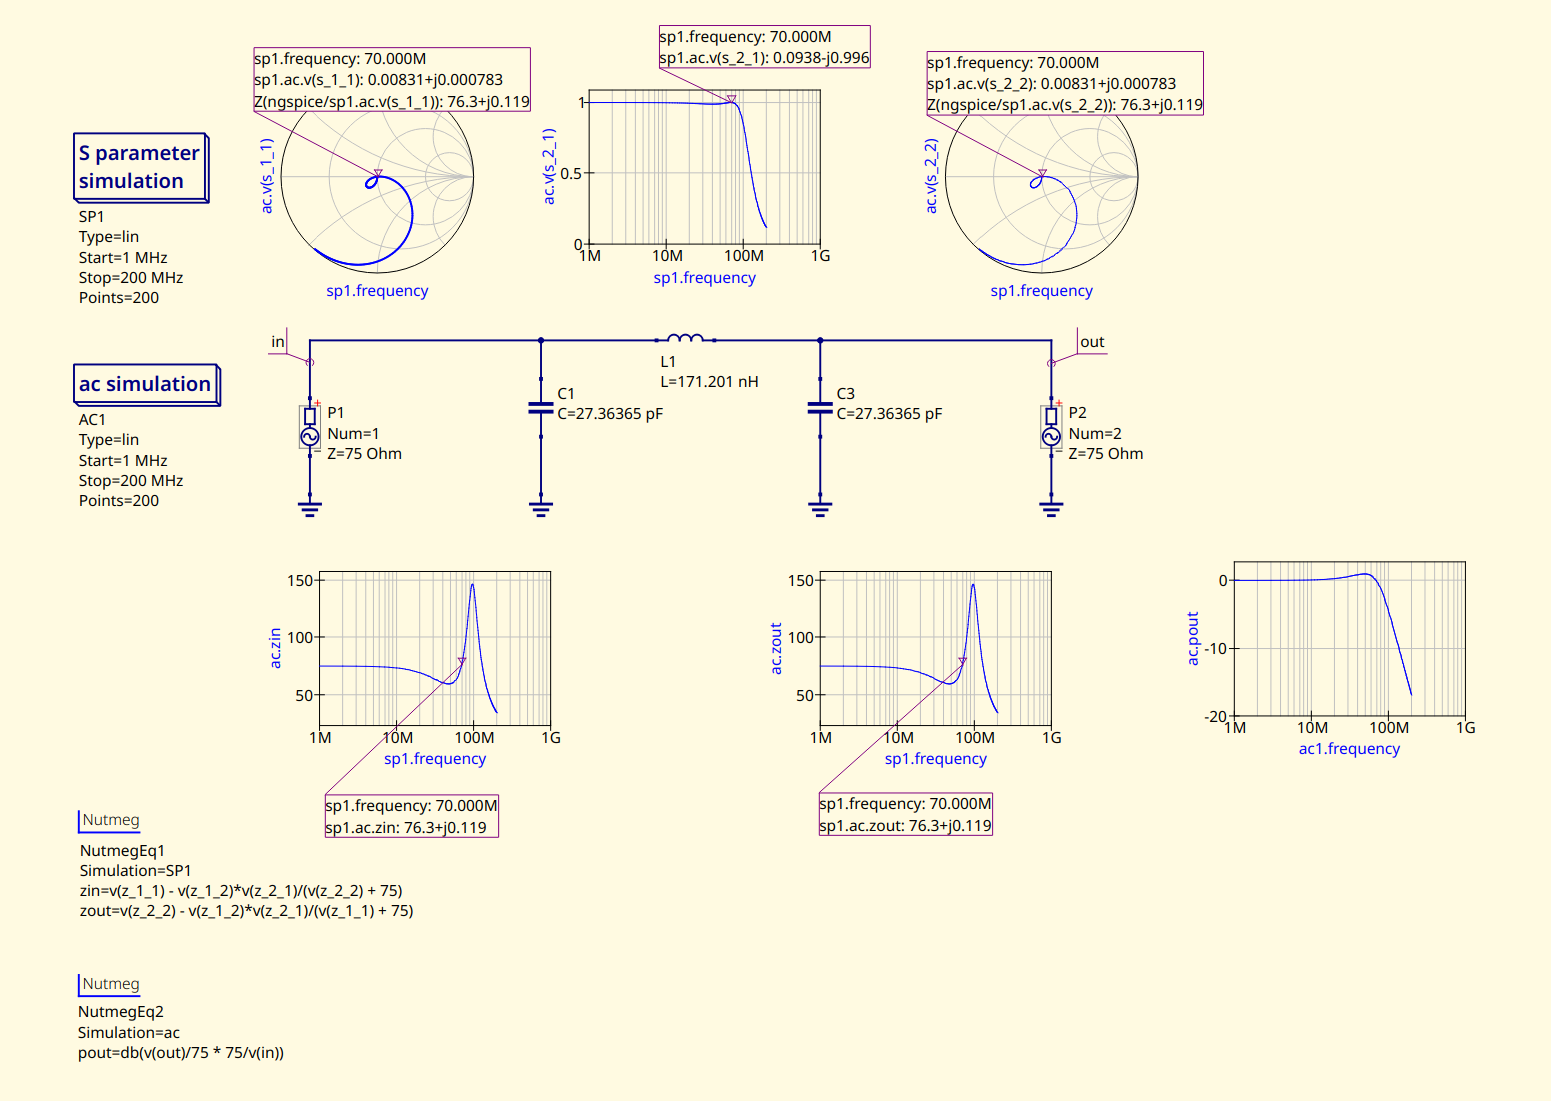